In [1]:
%matplotlib inline
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import plotly

In [152]:
def solve_implicit(x_start, x_end, h, tau, k, f, cur_t, prev_row, ua, ub):
    x, t = sp.symbols('x t')

    xs = np.arange(x_start, x_end + h, h)
    n = len(xs)
    
    a = np.zeros((n, n))
    b = np.zeros(n)
    
    for i in range(1, n - 1):
        a[i][i - 1] = - tau * k.subs({x: xi}) # a[i]
        a[i][i] = h**2 + 2 * tau * k.subs({x: xi}) # b[i]
        a[i][i + 1] = -tau * k.subs({x: xi}) # c[i]
        
        b[i] = h**2 * prev_row[i] + tau * h**2 * f.subs({x: xi, t: cur_t}) # f[i]
    
    # y0 = ua, yn = ub 
    a[0][0] = 1
    b[0] = ua.subs({t: cur_t})
    a[-1][-1] = 1
    b[-1] = ub.subs({t: cur_t})
    
    return np.linalg.solve(a, b)

In [153]:
def solve_explicit(x0, x1, t0, t1, h, tau, k, f, phi, ua, ub):
    x, t = sp.symbols('x t')
    
    xss = np.arange(x0, x1 + h, h)
    tss = np.arange(t0 + tau, t1 + tau, tau)
           
    nt, nx = len(tss) + 1, len(xss)
    u = np.zeros((nt, nx))
    
    for i, xi in enumerate(xss):
        u[0][i] = phi.subs({x: xi})
    
    for i, ti in enumerate(tss):
        u[i + 1][0] = ua.subs({t: ti})
        u[i + 1][-1] = ub.subs({t: ti})
    
    for i, ti in enumerate(np.arange(t0, t1 + tau, tau)):
        if i == 0:
            continue
        for j, xj in enumerate(np.arange(x0, x1, h)):
            if j == 0:
                continue
            u[i][j] = 1 / h**2 * (
                u[i - 1][j + 1] * tau * k + 
                u[i - 1][j] * (h**2 + tau * h * k.diff(x) - 2 * tau * k) + 
                u[i - 1][j - 1] * (tau * k - tau * h * k.diff(x)) +
                tau * h**2 * f
            ).subs({x: xj, t: ti})
            
    return u

In [210]:
x, tt = sp.symbols('x t')
x0, x1, t0, t1, ua, ub = 0, 1, 0, 0.1, 1, 1 * tt

k4 = 2
h = 0.2
tau = 0.5 * h**2 / k4 # tau <= 0.5 h**2 / k - условие устойчивости 
nt, nx = len(np.arange(t0, t1 + tau, tau)), len(np.arange(x0, x1 + h, h))
phi = x**2

g, t = sp.symbols('g t')
g = 0 * x + 0 * t

In [155]:
def get_u(x0, x1, t0, t1, k4, h, tau, phi, ua, ub):
    nx = len(np.arange(x0, x1 + h, h))
    u = np.zeros((nt, nx))

    for i, xi in enumerate(np.arange(x0, x1 + h, h)):
        u[0][i] = phi.subs({x: xi})

    for j, t in enumerate(np.arange(t0, t1, tau)):
        if j == 0:
            continue
        yy = solve_implicit(
            x_start=x0,
            x_end=x1,
            h=h,
            tau=tau,
            k=k4 + 0 * x,
            f=g,
            cur_t=t,
            prev_row=u[j - 1, :],
            ua=ua+0*tt,
            ub=ub
        )

        u[j] = yy
        
        if h >= 0.001:
            plt.plot(np.arange(x0, x1 + h, h), yy)
        
    plt.show()
    return u

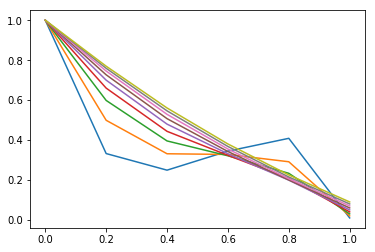

cur_h = 0, h = 


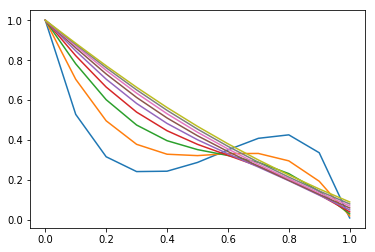

cur_h = 0, h = 


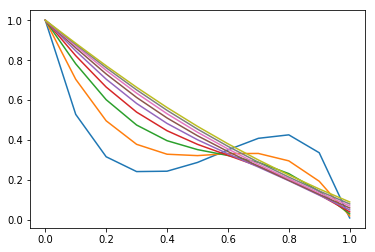

cur_h = 1, h = 


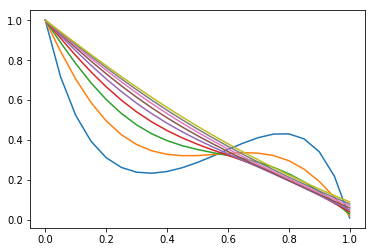

cur_h = 1, h = 


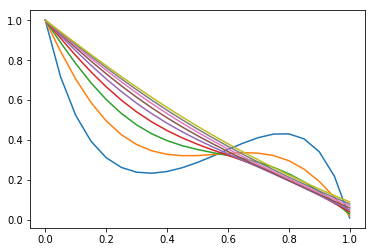

cur_h = 2, h = 


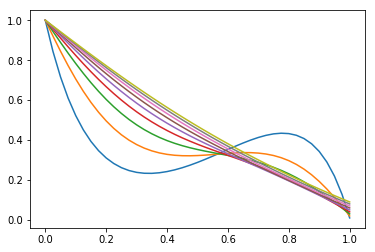

cur_h = 2, h = 


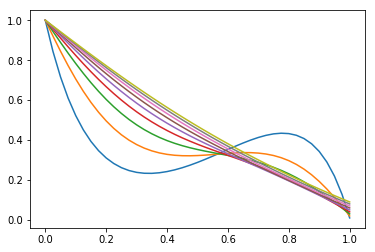

cur_h = 3, h = 


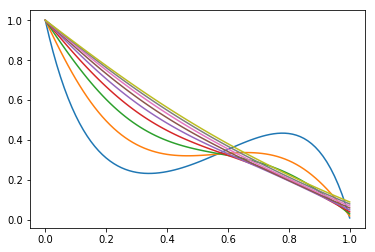

cur_h = 3, h = 


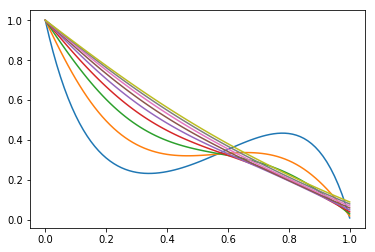

cur_h = 4, h = 


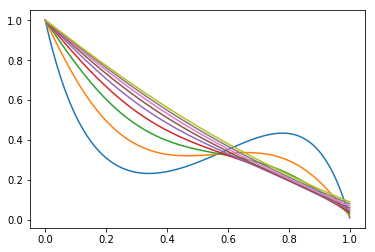

cur_h = 4, h = 


In [211]:
h = 0.2
h_steps = [h, h / 2, h / 4, h / 8, h / 16, h / 32]
errors = []

for cur_h in range(len(h_steps) - 1):
    h = h_steps[cur_h]
    u = get_u(x0, x1, t0, t1, k4, h, tau, phi, ua, ub)
    print('cur_h = {}, h = '.format(cur_h, h))
    
    h1 = h_steps[cur_h + 1]
    u1 = get_u(x0, x1, t0, t1, k4, h1, tau, phi, ua, ub)
    print('cur_h = {}, h = '.format(cur_h, h1))
    
    errors.append(np.mean(np.abs(u - u1[:, ::2])))

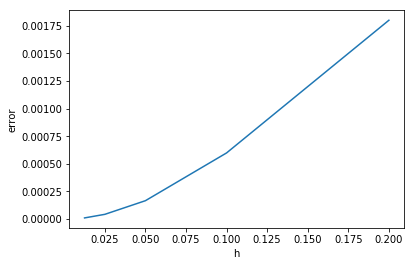

In [212]:
#errors
plt.xlabel('h')
plt.ylabel('error')
plt.plot(h_steps[:-1], errors)

In [174]:
s = np.arange(x0, x1 + h, h)
t = np.arange(t0, t1 + tau, tau)
tGrid, sGrid = np.meshgrid(t, s)

surface = go.Surface(x=sGrid[:, :-1], y=tGrid[:, :-1], z=u.T[:, :-1])
data = [surface]

layout = go.Layout(
    title='Parametric Plot',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            title='t',
            gridcolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            title='u(x, t)',
            gridcolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, auto_open=True)

'file://D:\\study\\MDA\\Sem 5\\lab3\\temp-plot.html'

In [186]:
def get_u_explicit(x0, x1, t0, t1, h, tau, k4, g, phi, ua, ub):
    tt = sp.symbols('t')
    u = solve_explicit(
        x0,
        x1,
        t0, 
        t1,
        h=h,
        tau=tau,
        k=k4 + 0 * x,
        f=g,
        phi=phi,
        ua=ua + 0 * tt,
        ub=ub
    )
    return u

In [206]:
h = 0.2
h_steps = [h, h / 2, h / 4, h / 8]
errors_explicit = []

for cur_h in range(len(h_steps) - 1):
    h = h_steps[cur_h]
    tau = 0.5 * h**2 / k4
    u = get_u_explicit(x0, x1, t0, t1, h, tau, k4, g, phi, ua, ub)
    
    h1 = h_steps[cur_h + 1]
    tau1 = 0.5 * h1**2 / k4
    u1 = get_u_explicit(x0, x1, t0, t1, h1, tau1, k4, g, phi, ua, ub)
    
    errors_explicit.append(np.mean(np.abs(u - u1[::int(tau // tau1), ::2])))

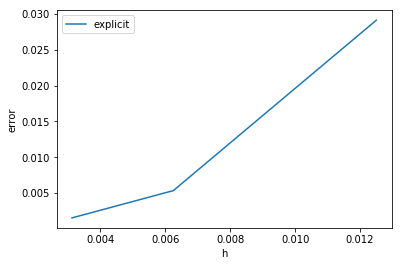

In [216]:
plt.xlabel('h')
plt.ylabel('error')

h_steps_explicit = [h, h / 2, h / 4, h / 8]

plt.xlabel('h')
plt.ylabel('error')
plt.plot(h_steps_explicit[:-1], errors_explicit, label='explicit')
#plt.plot(h_steps[:-1], errors, label='implicit')
plt.legend()

In [183]:
s = np.arange(x0, x1 + h, h)
t = np.arange(t0, t1 + tau, tau)
tGrid, sGrid = np.meshgrid(t, s)

surface = go.Surface(x=sGrid[:, :-1], y=tGrid[:, :-1], z=u.T[:, :-1])
data = [surface]

layout = go.Layout(
    title='Parametric Plot',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            title='t',
            gridcolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            title='u(x, t)',
            gridcolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, auto_open=True)

'file://D:\\study\\MDA\\Sem 5\\lab3\\temp-plot.html'

In [108]:
tau1, h

(0.0006250000000000001, 0.0125)